In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct
import platform
if platform.system() == 'Linux':
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/ptr.ipynb'
else:
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/ptr.ipynb'

### Pauli basis
\begin{equation}
\sigma_{0} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\text{, }
\sigma_{1} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\text{, }
\sigma_{2} = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\text{, }
\sigma_{3} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}.
\end{equation}

In [2]:
def Pauli(j):
    if j == 0:
        return Matrix([[1,0],[0,1]])
    elif j == 1:
        return Matrix([[0,1],[1,0]])
    elif j == 2:
        return Matrix([[0,-1j],[1j,0]])
    elif j == 3:
        return Matrix([[1,0],[0,-1]])

### Projector
\begin{equation}
P_{\psi} = |\psi\rangle\langle\psi|
\end{equation}

In [3]:
def proj(psi):
    return psi*Dagger(psi)

### Tensor product
\begin{equation}
x\otimes y
\end{equation}

In [4]:
def tp(x,y):
    return TensorProduct(x,y)

### Eigenvalues

In [5]:
# Outside this function, initialize: evals = zeros(d,1)
def eVals(d,A):
    eig = A.eigenvects()
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1]
        ne += mult
        nk = lk + mult
        for k in range(lk,nk):
            evals[k] = eig[j][0]
        lk = nk
        j += 1
    return evals

In [6]:
#evals = zeros(2,1); eVals(2,Pauli(2))

### Square root of an Hermitian matrix
\begin{equation}
\sqrt{A}=\sum_{j=1}^{d}\sqrt{a_{j}}|a_{j}\rangle\langle a_{j}|
\end{equation}

In [7]:
def mat_sqrt(d,A):
    eig = A.eigenvects()
    Asqrt = zeros(d,d)
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1]
        ne += mult
        for k in range(0,mult):
            Proj = proj(eig[j][2][k])
            Asqrt += sqrt(eig[j][0])*(Proj/trace(d,Proj))
        j += 1
    return Asqrt

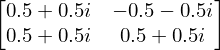

In [11]:
mat_sqrt(2,Pauli(2))

### Trace norm
\begin{equation}
||A||_{tr} = \mathrm{Tr}\sqrt{A^{\dagger}A} = \sum_{j}|a_{j}|,
\end{equation}
for $A=\sum_{j}a_{j}|a_{j}\rangle\langle a_{j}|$.

In [7]:
def normTr(d, A):
    eva = eVals(d, A)
    TrNorm = 0
    for j in range(0,d):
        TrNorm += abs(eva[j])
    return TrNorm